In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

# 练习3：餐厅小费情况分析
* 小费和总消费之间的关系（散点图）
* 男性顾客和女性顾客，谁更慷慨（分类箱式图）
* 抽烟与否是否会对小费金额产生影响（分类箱式图）
* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
* 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
* 就餐人数是否会对慷慨度产生影响（分类箱式图）
* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）


In [2]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
help(sns.load_dataset)

Help on function load_dataset in module seaborn.utils:

load_dataset(name, cache=True, data_home=None, **kws)
    Load a dataset from the online repository (requires internet).
    
    Parameters
    ----------
    name : str
        Name of the dataset (`name`.csv on
        https://github.com/mwaskom/seaborn-data).  You can obtain list of
        available datasets using :func:`get_dataset_names`
    cache : boolean, optional
        If True, then cache data locally and use the cache on subsequent calls
    data_home : string, optional
        The directory in which to cache data. By default, uses ~/seaborn-data/
    kws : dict, optional
        Passed to pandas.read_csv



In [3]:
import numpy as np
import pandas as pd

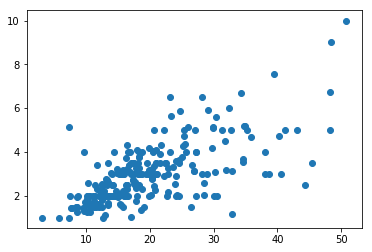

In [4]:
plt.scatter(data.total_bill ,  data.tip)

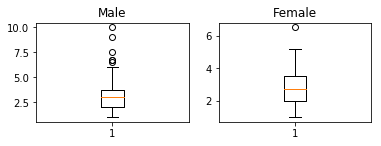

In [14]:
groupd = data.groupby('sex')
pIndex = 221
for key , group in groupd:
    plt.subplot(pIndex)
    plt.title(key)
    plt.boxplot(group.tip)
    pIndex = pIndex + 1

{'whiskers': [<matplotlib.lines.Line2D at 0x118822978>,
 'caps': [<matplotlib.lines.Line2D at 0x11870ca58>,
 'boxes': [<matplotlib.lines.Line2D at 0x11a5e95f8>,
 'medians': [<matplotlib.lines.Line2D at 0x11a69ed68>,
 'fliers': [<matplotlib.lines.Line2D at 0x11a69db38>,
 'means': []}

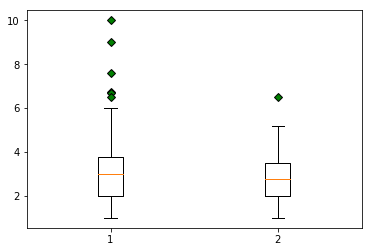

In [28]:
green_diamond = dict(markerfacecolor='g', marker='D')
grouped = data.groupby('sex')
sex_data = np.array([group.tip for key, group in grouped])
plt.boxplot(sex_data, flierprops=green_diamond)

{'whiskers': [<matplotlib.lines.Line2D at 0x11a7b5b00>,
 'caps': [<matplotlib.lines.Line2D at 0x11a7b5f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x11a7b5710>,
 'medians': [<matplotlib.lines.Line2D at 0x11a7be860>,
 'fliers': [<matplotlib.lines.Line2D at 0x11a7beba8>,
 'means': []}

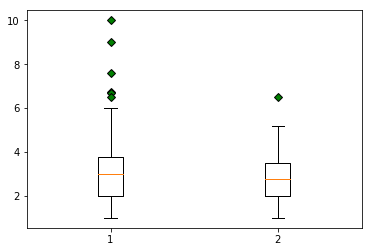

In [29]:
grouped = data.groupby('smoker')
smoker_data = np.array([group.tip for key, group in grouped])
plt.boxplot(sex_data, flierprops=green_diamond)

In [14]:
# data['day']=='Sun'
group_by_day = data.groupby(['day'])
group_by_day.size()

day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64

In [34]:
week_data = data[['day']].copy()
# week_data['weekend'] = np.where(data['day']=='Sun' | data['day']=='Sat', True, False)
# week_data['weekend'] = week_data[(week_data=='Sun')|(week_data=='Sat')]
#week_data.head()
#type((week_data=='Sun')|(week_data=='Sat'))
(week_data=='Sun').shape

(244, 1)

In [38]:
print(type(week_data))
print(type(week_data['day']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [39]:
type((week_data['day']=='Sun')|(week_data['day']=='Sat'))

pandas.core.series.Series

In [42]:
week_data = data[['day', 'tip']].copy()
week_data['weekend'] = (week_data['day']=='Sun')|(week_data['day']=='Sat')
week_data.head()

,day,tip,weekend
0,Sun,1.01,True
1,Sun,1.66,True
2,Sun,3.50,True
3,Sun,3.31,True
4,Sun,3.61,True


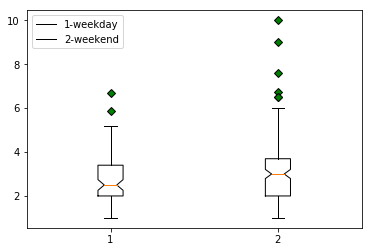

In [52]:
green_diamond = dict(markerfacecolor='g', marker='D')
grouped = week_data.groupby('weekend')
wk_data = np.array([group.tip for key, group in grouped])
plt.boxplot(wk_data, flierprops=green_diamond, notch=True)
plt.legend(['1-weekday','2-weekend'])

In [45]:
grouped.size()

weekend
False     81
True     163
dtype: int64

## 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）

In [54]:
data.groupby('time').size()

time
Lunch      68
Dinner    176
dtype: int64

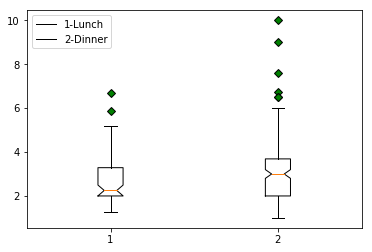

In [56]:
grouped = data.groupby('time')
meal_data = np.array([group.tip for key, group in grouped])
plt.boxplot(meal_data, flierprops=green_diamond, notch=True)
plt.legend(['1-Lunch','2-Dinner'])

## 就餐人数是否会对慷慨度产生影响（分类箱式图）

In [58]:
data.groupby('size').size()

size
1      4
2    156
3     38
4     37
5      5
6      4
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1225dada0>,
 'caps': [<matplotlib.lines.Line2D at 0x1225df470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1225d2c50>,
 'medians': [<matplotlib.lines.Line2D at 0x1225dfb00>,
 'fliers': [<matplotlib.lines.Line2D at 0x1225dfe48>,
 'means': []}

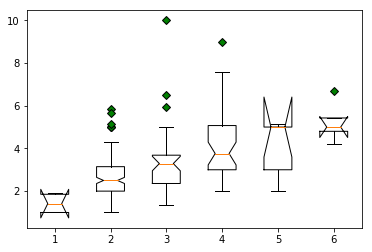

In [59]:
grouped = data.groupby('size')
size_data = np.array([group.tip for key, group in grouped])
plt.boxplot(size_data, flierprops=green_diamond, notch=True)

In [60]:
data[data['size']==5]

,total_bill,tip,sex,smoker,day,time,size
142,41.19,5.00,Male,No,Thur,Lunch,5
155,29.85,5.14,Female,No,Sun,Dinner,5
185,20.69,5.00,Male,No,Sun,Dinner,5
187,30.46,2.00,Male,Yes,Sun,Dinner,5
216,28.15,3.00,Male,Yes,Sat,Dinner,5


## 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

In [63]:
data.groupby(['sex','smoker']).size()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
dtype: int64

Male Yes 3.051166666666667
Male No 3.11340206185567
Female Yes 2.9315151515151516
Female No 2.7735185185185185


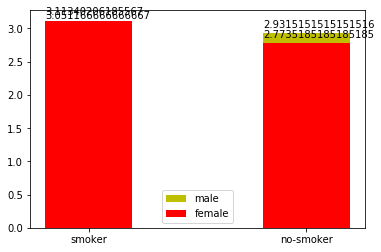

In [79]:
grouped = data.groupby(['sex','smoker'])
name=['smoker','no-smoker']
total_width, n = 0.8, 2
width = total_width/n
x=[0,1]
x2=x
for i in range(len(x)):
    x2[i] = x[i] + width
    
# a=plt.bar(x, l1, width=width, label='male',fc = 'y')
# b=plt.bar(x2, l2, width=width, label='female', tick_label=name, fc = 'r')
#定义函数来显示柱状上的数值
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.2, 1.03*height, '%s' % float(height))

l1 = []
l2 = []
for key, group in grouped:
    sex, is_smoker = key
    print(sex, is_smoker, group.tip.mean())
    if is_smoker=='Yes':
        l1.append(group.tip.mean())
    else:
        l2.append(group.tip.mean())

a=plt.bar(x, l1, width=width, label='male',fc = 'y')
b=plt.bar(x2, l2, width=width, label='female', tick_label=name, fc = 'r')
autolabel(a)
autolabel(b)
plt.legend()

## 分组柱状图例子

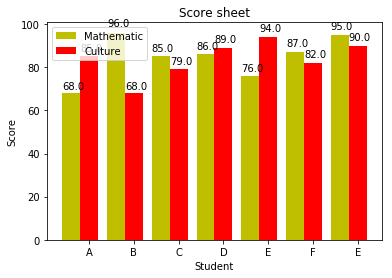

In [81]:
#定义函数来显示柱状上的数值
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.2, 1.03*height, '%s' % float(height))
    

l1=[68, 96, 85, 86, 76, 87, 95]
l2=[85, 68, 79, 89, 94, 82, 90]

name=['A','B','C','D','E','F','E']
total_width, n = 0.8, 2
width = total_width / n
x=[0,1,2,3,4,5,6]

a=plt.bar(x, l1, width=width, label='Mathematic',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
b=plt.bar(x, l2, width=width, label='Culture',tick_label = name,fc = 'r')

autolabel(a)
autolabel(b)

plt.xlabel('Student')
plt.ylabel('Score')
plt.title('Score sheet')
plt.legend()
plt.show()
